# PRCP-1014

#### Vaccinatino Prediction Description- Project

Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [1]:
#!pip install pandas_profiling

In [2]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
rand_state = 10
n_iterations = 5

In [7]:
# Load the data
feature_data = pd.read_csv('../../Data/features.csv')

In [8]:
feature_data.head(5)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [9]:
feature_data.shape

(26707, 36)

In [10]:
label_data= pd.read_csv('../../Data/labels.csv')

In [11]:
label_data.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [12]:
label_data.shape

(26707, 3)

In [13]:
vaccine_data=pd.concat([feature_data, label_data],sort=False,axis=1)

In [14]:
vaccine_data.head(5)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...   employment_status  hhs_geo_region  \
0                    1.0  ...  Not in Labor Force        oxchjgsf   
1                    1.0  ...            Employed        bhuqouqj   
2                    0.0  ...            Employed        qufhixun   
3                    0.0  ...  Not in Labor Force        lrircsnp   
4                    1.0  ...            Employed        qufhixun   

                 census_msa  household_adults  household_children  \
0                   Non-MSA               0.0                 0.0   
1  MSA, Not Principle  City               0.0                 0.0   
2  MSA, Not Principle  City               2.0                 0.0   
3       MSA, Principle City               0.0                 0.0   
4  MSA, Not Principle  City               1.0                 0.0   

   employment_industry  employment_occupation  respondent_id  h1n1_vaccine  \
0                  NaN                    NaN              0             0   
1             pxcmvdjn               xgwztkwe              1             0   
2             rucpziij               xtkaffoo              2             0   
3                  NaN                    NaN              3             0   
4             wxleyezf               emcorrxb              4             0   

   seasonal_vaccine  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 39 columns]

In [34]:
vaccine_data.drop(columns=['status'], axis=1, inplace=True)

In [37]:
vaccine_data['status']=np.where(((vaccine_data['h1n1_vaccine']==1)&(vaccine_data['seasonal_vaccine']==1)),
                                1, np.where(((vaccine_data['h1n1_vaccine']==1)&(vaccine_data['seasonal_vaccine']==0)),
                                2, np.where(((vaccine_data['h1n1_vaccine']==0)&(vaccine_data['seasonal_vaccine']==1)),
                                3, 4)))

In [38]:
vaccine_data.head(40) 

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1                1           3.0             2.0                        0.0   
7                7           1.0             0.0                        0.0   
10              10           2.0             1.0                        0.0   
11              11           1.0             2.0                        0.0   
15              15           1.0             1.0                        0.0   
17              17           1.0             1.0                        0.0   
21              21           2.0             2.0                        0.0   
22              22           1.0             1.0                        0.0   
34              34           1.0             1.0                        0.0   
36              36           2.0             2.0                        0.0   
40              40           0.0             2.0                        0.0   
41              41           2.0             1.0                        0.0   
47              47           0.0             2.0                        0.0   
51              51           0.0             1.0                        0.0   
55              55           1.0             1.0                        0.0   
58              58           2.0             2.0                        0.0   
60              60           3.0             2.0                        0.0   
70              70           2.0             1.0                        1.0   
77              77           1.0             1.0                        0.0   
81              81           3.0             1.0                        0.0   
82              82           2.0             2.0                        0.0   
83              83           3.0             1.0                        0.0   
85              85           2.0             1.0                        0.0   
92              92           1.0             1.0                        0.0   
101            101           1.0             2.0                        0.0   
108            108           3.0             2.0                        0.0   
112            112           3.0             2.0                        0.0   
116            116           2.0             1.0                        0.0   
118            118           0.0             2.0                        0.0   
121            121           1.0             1.0                        0.0   
124            124           0.0             1.0                        0.0   
131            131           3.0             1.0                        0.0   
156            156           1.0             2.0                        0.0   
157            157           1.0             1.0                        0.0   
159            159           2.0             1.0                        0.0   
163            163           2.0             1.0                        0.0   
166            166           1.0             1.0                        0.0   
171            171           1.0             1.0                        0.0   
176            176           0.0             1.0                        0.0   
181            181           3.0             1.0                        0.0   

     behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
1                     1.0                   0.0                    1.0   
7                     1.0                   0.0                    1.0   
10                    1.0                   0.0                    1.0   
11                    1.0                   0.0                    1.0   
15                    1.0                   0.0                    0.0   
17                    0.0                   0.0                    1.0   
21                    1.0                   0.0                    1.0   
22                    1.0                   0.0                    1.0   
34                    1.0                   0.0                    0.0   
36                    1.0

In [39]:
print("Shape :",vaccine_data.shape)
print("Rows : ",vaccine_data.shape[0])
print("Columns : ",vaccine_data.shape[1])
print("\nFeatures : \n" ,vaccine_data.columns.tolist())
print("\n Missing Values : ",vaccine_data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,vaccine_data.nunique(dropna=False))

Shape : (6437, 40)
Rows :  6437
Columns :  40

Features : 
 ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'status']

 Missing Values :  0

Unique Values : 
 respondent_id                  6437
h1n1_concern                    

In [40]:
#Treating NAN values
import numpy as np
np.nan
np.nan == np.nan
vaccine_data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1               1           3.0             2.0                        0.0   
7               7           1.0             0.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
15             15           1.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
1                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
15                   1.0                   0.0                    0.0   

    behavioral_large_gatherings  behavioral_outside_home  \
1                           0.0                      1.0   
7                           0.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
15                          0.0                      0.0   

    behavioral_touch_face  ...  hhs_geo_region                census_msa  \
1                     1.0  ...        bhuqouqj  MSA, Not Principle  City   
7                     1.0  ...        bhuqouqj                   Non-MSA   
10                    0.0  ...        lzgpxyit  MSA, Not Principle  City   
11                    0.0  ...        oxchjgsf                   Non-MSA   
15                    0.0  ...        lzgpxyit  MSA, Not Principle  City   

    household_adults  household_children  employment_industry  \
1                0.0                 0.0             pxcmvdjn   
7                2.0                 0.0             pxcmvdjn   
10               2.0                 0.0             xicduogh   
11               1.0                 2.0             xicduogh   
15               1.0                 3.0             wxleyezf   

    employment_occupation  respondent_id  h1n1_vaccine  seasonal_vaccine  \
1                xgwztkwe              1             0                 1   
7                xqwwgdyp              7             1                 1   
10               qxajmpny             10             1                 1   
11               ccgxvspp             11             1                 1   
15               emcorrxb             15             0                 0   

    status  
1        3  
7        1  
10       1  
11       1  
15       4  

[5 rows x 40 columns]

In [41]:
vaccine_data=vaccine_data.dropna()
vaccine_data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1               1           3.0             2.0                        0.0   
7               7           1.0             0.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
15             15           1.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
1                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
15                   1.0                   0.0                    0.0   

    behavioral_large_gatherings  behavioral_outside_home  \
1                           0.0                      1.0   
7                           0.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
15                          0.0                      0.0   

    behavioral_touch_face  ...  hhs_geo_region                census_msa  \
1                     1.0  ...        bhuqouqj  MSA, Not Principle  City   
7                     1.0  ...        bhuqouqj                   Non-MSA   
10                    0.0  ...        lzgpxyit  MSA, Not Principle  City   
11                    0.0  ...        oxchjgsf                   Non-MSA   
15                    0.0  ...        lzgpxyit  MSA, Not Principle  City   

    household_adults  household_children  employment_industry  \
1                0.0                 0.0             pxcmvdjn   
7                2.0                 0.0             pxcmvdjn   
10               2.0                 0.0             xicduogh   
11               1.0                 2.0             xicduogh   
15               1.0                 3.0             wxleyezf   

    employment_occupation  respondent_id  h1n1_vaccine  seasonal_vaccine  \
1                xgwztkwe              1             0                 1   
7                xqwwgdyp              7             1                 1   
10               qxajmpny             10             1                 1   
11               ccgxvspp             11             1                 1   
15               emcorrxb             15             0                 0   

    status  
1        3  
7        1  
10       1  
11       1  
15       4  

[5 rows x 40 columns]

In [42]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6437 entries, 1 to 26703
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                6437 non-null   int64  
 1   h1n1_concern                 6437 non-null   float64
 2   h1n1_knowledge               6437 non-null   float64
 3   behavioral_antiviral_meds    6437 non-null   float64
 4   behavioral_avoidance         6437 non-null   float64
 5   behavioral_face_mask         6437 non-null   float64
 6   behavioral_wash_hands        6437 non-null   float64
 7   behavioral_large_gatherings  6437 non-null   float64
 8   behavioral_outside_home      6437 non-null   float64
 9   behavioral_touch_face        6437 non-null   float64
 10  doctor_recc_h1n1             6437 non-null   float64
 11  doctor_recc_seasonal         6437 non-null   float64
 12  chronic_med_condition        6437 non-null   float64
 13  child_under_6_mon

In [43]:
vaccine_data.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count    6437.000000   6437.000000     6437.000000                6437.000000   
mean    13459.940190      1.477396        1.346435                   0.054995   
std      7678.609343      0.856914        0.579515                   0.227987   
min         1.000000      0.000000        0.000000                   0.000000   
25%      6860.000000      1.000000        1.000000                   0.000000   
50%     13437.000000      2.000000        1.000000                   0.000000   
75%     20129.000000      2.000000        2.000000                   0.000000   
max     26703.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           6437.000000           6437.000000            6437.000000   
mean               0.718502              0.061364               0.818860   
std                0.449765              0.240015               0.385164   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  6437.000000              6437.000000   
mean                      0.269691                 0.250583   
std                       0.443834                 0.433382   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  opinion_h1n1_sick_from_vacc  \
count            6437.000000  ...                  6437.000000   
mean                0.665527  ...                     2.260214   
std                 0.471842  ...                     1.321944   
min                 0.000000  ...                     1.000000   
25%                 0.000000  ...                     1.000000   
50%                 1.000000  ...                     2.000000   
75%                 1.000000  ...                     4.000000   
max                 1.000000  ...                     5.000000   

       opinion_seas_vacc_effective  opinion_seas_risk  \
count                  6437.000000        6437.000000   
mean                      3.977319           2.711046   
std                       1.086436           1.384711   
min                       1.000000           1.000000   
25%                       4.000000           2.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_seas_sick_from_vacc  household_adults  household_children  \
count                  6437.000000       6437.000000         6437.000000   
mean                      2.078453          0.962249            0.642225   
std                       1.305995          0.750784            0.974428   
min                       1.000000          0.000000            0.000000   
25%                       1.000000          0.000000            0.000000   
50%                       2.000000          1.000000            0.000000   
75%                       2.000000          1.000000            1.000000   
max                       5.000000          3.000000            3.000000   

       respondent_id  h1n1_vaccine  seasonal_vaccine       status  
count    6437.000000   6437.000000       6437.000000  6437.000000  
mean    13459.940190      0.300606          0.457667     2.941122  
std      7678.609343      

In [44]:
print('\nUnique values of vaccine_data.h1n1_concern:: \n',vaccine_data.h1n1_concern.value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_knowledge:: \n',vaccine_data.h1n1_knowledge.value_counts(dropna = False))
print('\nUnique values of behavioral_antiviral_meds:: \n',vaccine_data.behavioral_antiviral_meds.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_avoidance:: \n',vaccine_data.behavioral_avoidance.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_face_mask:: \n',vaccine_data.behavioral_face_mask.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_wash_hands:: \n',vaccine_data.behavioral_wash_hands.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_large_gatherings:: \n',vaccine_data.behavioral_large_gatherings.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_outside_home:: \n',vaccine_data.behavioral_outside_home.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_touch_face:: \n',vaccine_data.behavioral_touch_face.value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_h1n1 :: \n',vaccine_data.doctor_recc_h1n1 .value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_seasonal :: \n',vaccine_data.doctor_recc_seasonal .value_counts(dropna = False))
print('\nUnique values of vaccine_data.chronic_med_condition :: \n',vaccine_data.chronic_med_condition .value_counts(dropna = False))
print('\nUnique values of vaccine_data.child_under_6_months:: \n',vaccine_data.child_under_6_months.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_worker:: \n',vaccine_data.health_worker.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_insurance :: \n',vaccine_data.health_insurance .value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_vacc_effective:: \n',vaccine_data.opinion_h1n1_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_risk:: \n',vaccine_data.opinion_h1n1_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_sick_from_vacc:: \n',vaccine_data.opinion_h1n1_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_vacc_effective:: \n',vaccine_data.opinion_seas_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_risk:: \n',vaccine_data.opinion_seas_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_sick_from_vacc:: \n',vaccine_data.opinion_seas_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.age_group:: \n',vaccine_data.age_group.value_counts(dropna = False))
print('\nUnique values of vaccine_data.education :: \n',vaccine_data.education .value_counts(dropna = False))
print('\nUnique values of vaccine_data.race :: \n',vaccine_data.race .value_counts(dropna = False))
print('\nUnique values of vaccine_data.sex  :: \n',vaccine_data.sex  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.income_poverty  :: \n',vaccine_data.income_poverty .value_counts(dropna = False))
print('\nUnique values of vaccine_data.marital_status  :: \n',vaccine_data.marital_status  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.rent_or_own  :: \n',vaccine_data.rent_or_own  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_status  :: \n',vaccine_data.employment_status .value_counts(dropna = False))
print('\nUnique values of vaccine_data.hhs_geo_region   :: \n',vaccine_data.hhs_geo_region .value_counts(dropna = False))
print('\nUnique values of vaccine_data.census_msa   :: \n',vaccine_data.census_msa  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_adults:: \n',vaccine_data.household_adults.value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_children:: \n',vaccine_data.household_children.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_industry:: \n',vaccine_data.employment_industry.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_occupation :: \n',vaccine_data.employment_occupation .value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_vaccine  :: \n',vaccine_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.seasonal_vaccine  :: \n',vaccine_data.seasonal_vaccine .value_counts(dropna = False))



Unique values of vaccine_data.h1n1_concern:: 
 2.0    2530
1.0    2347
0.0     859
3.0     701
Name: h1n1_concern, dtype: int64

Unique values of vaccine_data.h1n1_knowledge:: 
 1.0    3503
2.0    2582
0.0     352
Name: h1n1_knowledge, dtype: int64

Unique values of behavioral_antiviral_meds:: 
 0.0    6083
1.0     354
Name: behavioral_antiviral_meds, dtype: int64

Unique values of vaccine_data.behavioral_avoidance:: 
 1.0    4625
0.0    1812
Name: behavioral_avoidance, dtype: int64

Unique values of vaccine_data.behavioral_face_mask:: 
 0.0    6042
1.0     395
Name: behavioral_face_mask, dtype: int64

Unique values of vaccine_data.behavioral_wash_hands:: 
 1.0    5271
0.0    1166
Name: behavioral_wash_hands, dtype: int64

Unique values of vaccine_data.behavioral_large_gatherings:: 
 0.0    4701
1.0    1736
Name: behavioral_large_gatherings, dtype: int64

Unique values of vaccine_data.behavioral_outside_home:: 
 0.0    4824
1.0    1613
Name: behavioral_outside_home, dtype: int64

Uniq

In [45]:
vaccine_data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

###### Grouping columns into Categorical and Continuous column list

In [46]:
# Grouping columns into Categorical and Continuous column list
Catvar_list=['income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
Convar_list=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','household_adults','household_children']


###### Checking the distribution of data for continuous variables

In [47]:
#vaccine_data[Convar_list].hist(figsize=(20,20))

###### Checking the Data distribution for the Categorical features

In [48]:
#Plot categorical data using Seaborn's facegrid and Panda's melt function
#fig, ax=plt.subplots(1, len(Catvar_list) , figsize=(30,10))
#for i, j in enumerate(vaccine_data[Catvar_list]):
   # vaccine_data[j].value_counts().plot(kind="bar", ax=ax[i]).set_title(j)
    
#fig.show()

###### Correlation Matrix

In [49]:
# Checking for Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='viridis', vmax=.3 ,vmin=.03 ,center=0,square=True, linewidths=.2, cbar_kws={"shrink": .2}, annot=True)

NameError: name 'corr' is not defined

<Figure size 1080x1080 with 0 Axes>

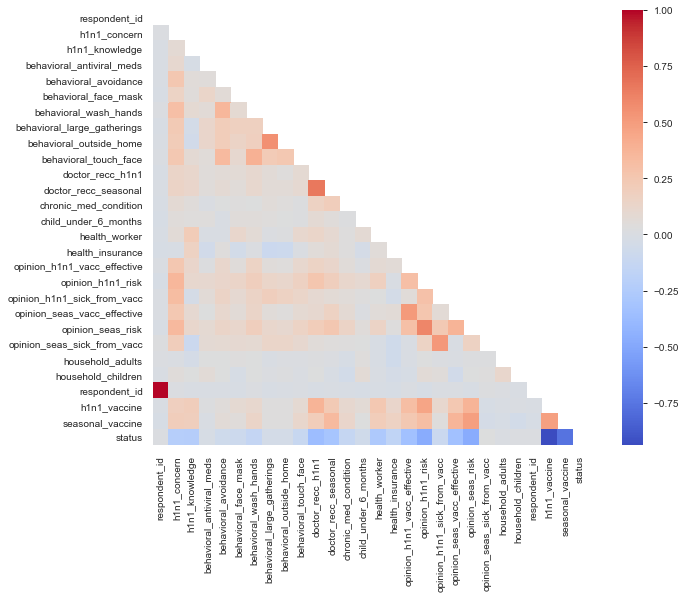

In [50]:
corr=vaccine_data.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(12,8))
    ax=sns.heatmap(corr,mask=mask,vmax=1,square=True,cmap='coolwarm')

###### Checking for Outlier

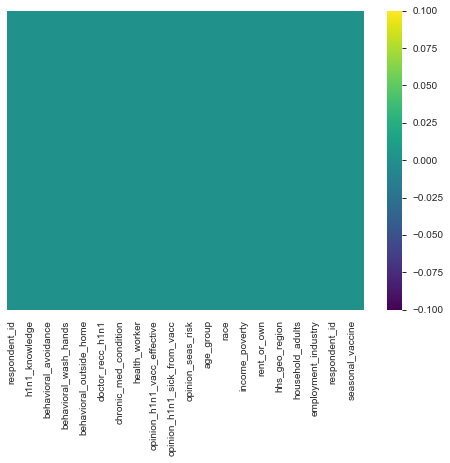

In [51]:
sns.set_style('whitegrid')
sns.heatmap(vaccine_data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

###### Data Imputation

In [52]:
feature_data_imp = feature_data.drop(columns=['respondent_id', 'health_insurance', 'employment_industry', 'employment_occupation'], axis=1)

In [53]:
num_cols = feature_data_imp.select_dtypes([np.number]).columns
non_num_cols = feature_data_imp.select_dtypes(exclude = [np.number]).columns
feature_data_imp[num_cols] = feature_data_imp[num_cols].fillna(feature_data_imp[num_cols].mean())
feature_data_imp[non_num_cols] = feature_data_imp[non_num_cols].fillna(feature_data_imp[non_num_cols].mode().iloc[0])

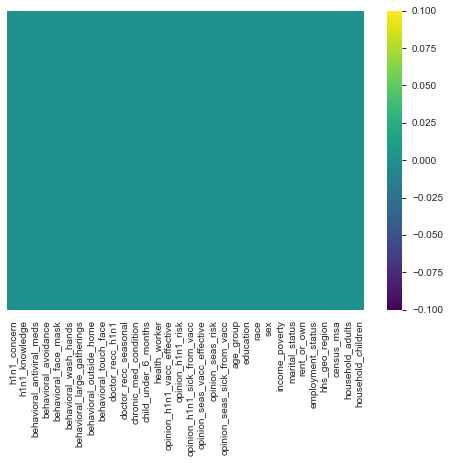

In [54]:
sns.set_style('whitegrid')
sns.heatmap(feature_data_imp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

###### Visualization using 'Pandas Profiling'

In [55]:
from pandas_profiling import ProfileReport
prof = ProfileReport(feature_data)
prof.to_file(output_file='output.html')

In [56]:
prof

###### Label Encoding

In [57]:
labelencoder = LabelEncoder()

In [58]:
objList = vaccine_data.select_dtypes(include = "object").columns
objList

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [59]:
for feat in objList:
    vaccine_data[feat] = labelencoder.fit_transform(vaccine_data[feat].astype(str))

In [60]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6437 entries, 1 to 26703
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                6437 non-null   int64  
 1   h1n1_concern                 6437 non-null   float64
 2   h1n1_knowledge               6437 non-null   float64
 3   behavioral_antiviral_meds    6437 non-null   float64
 4   behavioral_avoidance         6437 non-null   float64
 5   behavioral_face_mask         6437 non-null   float64
 6   behavioral_wash_hands        6437 non-null   float64
 7   behavioral_large_gatherings  6437 non-null   float64
 8   behavioral_outside_home      6437 non-null   float64
 9   behavioral_touch_face        6437 non-null   float64
 10  doctor_recc_h1n1             6437 non-null   float64
 11  doctor_recc_seasonal         6437 non-null   float64
 12  chronic_med_condition        6437 non-null   float64
 13  child_under_6_mon

In [61]:
vaccine_data.head(10)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1               1           3.0             2.0                        0.0   
7               7           1.0             0.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
15             15           1.0             1.0                        0.0   
17             17           1.0             1.0                        0.0   
21             21           2.0             2.0                        0.0   
22             22           1.0             1.0                        0.0   
34             34           1.0             1.0                        0.0   
36             36           2.0             2.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
1                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
15                   1.0                   0.0                    0.0   
17                   0.0                   0.0                    1.0   
21                   1.0                   0.0                    1.0   
22                   1.0                   0.0                    1.0   
34                   1.0                   0.0                    0.0   
36                   1.0                   0.0                    1.0   

    behavioral_large_gatherings  behavioral_outside_home  \
1                           0.0                      1.0   
7                           0.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
15                          0.0                      0.0   
17                          1.0                      0.0   
21                          0.0                      0.0   
22                          0.0                      0.0   
34                          0.0                      0.0   
36                          0.0                      0.0   

    behavioral_touch_face  ...  hhs_geo_region  census_msa  household_adults  \
1                     1.0  ...               1           0               0.0   
7                     1.0  ...               1           2               2.0   
10                    0.0  ...               6           0               2.0   
11                    0.0  ...               8           2               1.0   
15                    0.0  ...               6           0               1.0   
17                    1.0  ...               6           0               1.0   
21                    1.0  ...               9           0               1.0   
22                    1.0  ...               3           0               2.0   
34                    0.0  ...               7           0               1.0   
36                    1.0  ...               6           2               2.0   

    household_children  employment_industry  employment_occupation  \
1                  0.0                   12                     19   
7                  0.0                   12                     20   
10                 0.0                   19                     13   
11                 2.0                   19                      1   
15                 3.0                   18                      5   
17                 0.0                   14                     21   
21                 0.0                    6                     10   
22                 1.0                   18                      5   
34                 2.0                   18                      0   
36                 0.0                   12                     19   

    respondent_id  h1n1_vacc

###### Defining 'X' data & 'y' & Training the dataset

In [62]:
X_DT=vaccine_data.iloc[:,:-4]
y_DT=vaccine_data.status

In [63]:
X_DT.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1               1           3.0             2.0                        0.0   
7               7           1.0             0.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
15             15           1.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
1                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
15                   1.0                   0.0                    0.0   

    behavioral_large_gatherings  behavioral_outside_home  \
1                           0.0                      1.0   
7                           0.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
15                          0.0                      0.0   

    behavioral_touch_face  ...  income_poverty  marital_status  rent_or_own  \
1                     1.0  ...               2               1            1   
7                     1.0  ...               0               0            0   
10                    0.0  ...               0               0            1   
11                    0.0  ...               1               0            0   
15                    0.0  ...               1               0            0   

    employment_status  hhs_geo_region  census_msa  household_adults  \
1                   0               1           0               0.0   
7                   0               1           2               2.0   
10                  0               6           0               2.0   
11                  0               8           2               1.0   
15                  0               6           0               1.0   

    household_children  employment_industry  employment_occupation  
1                  0.0                   12                     19  
7                  0.0                   12                     20  
10                 0.0                   19                     13  
11                 2.0                   19                      1  
15                 3.0                   18                      5  

[5 rows x 36 columns]

In [64]:
#y_DT=vaccine_data.status

In [77]:
y_DT.head(20)

1     3
7     1
10    1
11    1
15    4
17    4
21    3
22    4
34    1
36    3
40    4
41    1
47    2
51    3
55    4
58    4
60    1
70    4
77    3
81    3
Name: status, dtype: int32

In [66]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y_DT, test_size=0.25, random_state=10)

In [67]:
XGBoostError = ""
LightGBMError = ""
ValueError = ""
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    #except (XGBoostError, LightGBMError, ValueError):
    except:
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    plt.rcParams.update({'figure.autolayout': True})
    #plt.rcParams["axes.edgecolor"] = "0.15"
    #plt.rcParams["axes.linewidth"]  = 1.25
    #plt.grid()

    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(figsize=figsize)
    #plt.title("Feature Importances", fontsize = 15, fontweight="bold")
    plt.xlabel('Feature Importance Score', fontsize = 15)
    plt.ylabel('Features', fontsize = 15)
    plt.savefig('Feature_Importance_before_scaling_ohe.png')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

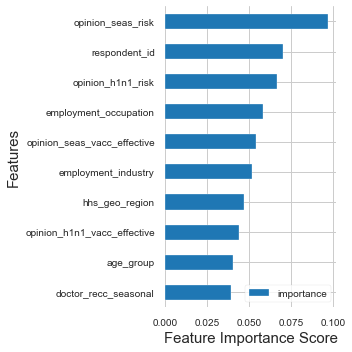

importance
feature                                
doctor_recc_seasonal           0.039102
age_group                      0.040437
opinion_h1n1_vacc_effective    0.043711
hhs_geo_region                 0.046954
employment_industry            0.051576
opinion_seas_vacc_effective    0.053995
employment_occupation          0.058116
opinion_h1n1_risk              0.066407
respondent_id                  0.070313
opinion_seas_risk              0.097030

In [68]:
plot_feature_importances(RandomForestClassifier(random_state=rand_state), X_train_DT, y_train_DT, top_n=10, figsize=(5,5))

In [69]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_DT,y_train_DT)
y_pred = clf.predict(X_test_DT)

In [70]:
#dot_data = tree.export_graphviz(clf, out_file=None, 
                               # feature_names=X_train_DT.columns,  
                                #class_names=['no', 'yes'],
                               # filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph
#graph.render("DT")

###### Scaling the data set

In [71]:
scaler = MinMaxScaler()

In [73]:
vaccine_data_scaled = pd.DataFrame(scaler.fit_transform(X_DT), columns=X_DT.columns)

In [74]:
vaccine_data_scaled.head(20)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0        0.000000      1.000000             1.0                        0.0   
1        0.000225      0.333333             0.0                        0.0   
2        0.000337      0.666667             0.5                        0.0   
3        0.000375      0.333333             1.0                        0.0   
4        0.000524      0.333333             0.5                        0.0   
5        0.000599      0.333333             0.5                        0.0   
6        0.000749      0.666667             1.0                        0.0   
7        0.000786      0.333333             0.5                        0.0   
8        0.001236      0.333333             0.5                        0.0   
9        0.001311      0.666667             1.0                        0.0   
10       0.001461      0.000000             1.0                        0.0   
11       0.001498      0.666667             0.5                        0.0   
12       0.001723      0.000000             1.0                        0.0   
13       0.001873      0.000000             0.5                        0.0   
14       0.002022      0.333333             0.5                        0.0   
15       0.002135      0.666667             1.0                        0.0   
16       0.002210      1.000000             1.0                        0.0   
17       0.002584      0.666667             0.5                        1.0   
18       0.002846      0.333333             0.5                        0.0   
19       0.002996      1.000000             0.5                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                    1.0                   0.0                    1.0   
1                    1.0                   0.0                    1.0   
2                    1.0                   0.0                    1.0   
3                    1.0                   0.0                    1.0   
4                    1.0                   0.0                    0.0   
5                    0.0                   0.0                    1.0   
6                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
8                    1.0                   0.0                    0.0   
9                    1.0                   0.0                    1.0   
10                   0.0                   0.0                    0.0   
11                   1.0                   0.0                    1.0   
12                   0.0                   0.0                    1.0   
13                   1.0                   0.0                    0.0   
14                   1.0                   0.0                    1.0   
15                   1.0                   0.0                    1.0   
16                   1.0                   0.0                    1.0   
17                   1.0                   0.0                    0.0   
18                   1.0                   0.0                    0.0   
19                   1.0                   0.0                    1.0   

    behavioral_large_gatherings  behavioral_outside_home  \
0                           0.0                      1.0   
1                           0.0                      0.0   
2                           1.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
5                           1.0                      0.0   
6                           0.0                      0.0   
7                           0.0                      0.0   
8                           0.0                      0.0   
9                           0.0                      0.0   
10                          0.0                      0.0   
11                          0.0                      1.0   
12                          0.0                    

In [75]:
vaccine_data_scaled.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count    6437.000000   6437.000000     6437.000000                6437.000000   
mean        0.504042      0.492465        0.673217                   0.054995   
std         0.287567      0.285638        0.289757                   0.227987   
min         0.000000      0.000000        0.000000                   0.000000   
25%         0.256872      0.333333        0.500000                   0.000000   
50%         0.503183      0.666667        0.500000                   0.000000   
75%         0.753801      0.666667        1.000000                   0.000000   
max         1.000000      1.000000        1.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           6437.000000           6437.000000            6437.000000   
mean               0.718502              0.061364               0.818860   
std                0.449765              0.240015               0.385164   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  6437.000000              6437.000000   
mean                      0.269691                 0.250583   
std                       0.443834                 0.433382   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  income_poverty  marital_status  \
count            6437.000000  ...     6437.000000     6437.000000   
mean                0.665527  ...        0.271322        0.416188   
std                 0.471842  ...        0.308338        0.492964   
min                 0.000000  ...        0.000000        0.000000   
25%                 0.000000  ...        0.000000        0.000000   
50%                 1.000000  ...        0.000000        0.000000   
75%                 1.000000  ...        0.500000        1.000000   
max                 1.000000  ...        1.000000        1.000000   

       rent_or_own  employment_status  hhs_geo_region   census_msa  \
count  6437.000000             6437.0     6437.000000  6437.000000   
mean      0.224794                0.0        0.539986     0.409663   
std       0.417479                0.0        0.315663     0.407877   
min       0.000000                0.0        0.000000     0.000000   
25%       0.000000                0.0        0.333333     0.000000   
50%       0.000000                0.0        0.555556     0.500000   
75%       0.000000                0.0        0.777778     1.000000   
max       1.000000                0.0        1.000000     1.000000   

       household_adults  household_children  employment_industry  \
count       6437.000000         6437.000000          6437.000000   
mean           0.320750            0.214075             0.479509   
std            0.250261            0.324809             0.333984   
min            0.000000            0.000000             0.000000   
25%            0.000000            0.000000             0.200000   
50%            0.333333            0.000000             0.400000   
75%            0.333333            0.333333             0.850000   
max            1.000000            1.000000             1.000000   

       employment_occupation  
count            6437.000000  
mean                0.519405  
std                 0.316522  
min                 0.000000  
25%

###### SMOTE

In [78]:
X = vaccine_data_scaled#.drop(columns=['status', 'h1n1_vaccine','seasonal_vaccine'], axis=1)
#X = vaccine_data_scaled.drop(columns=['status'], axis=1)

y = y_DT
#smote = SMOTE()
#X_smote, y_smote = smote.fit_sample(X.astype('int'), y)
#X_smote, y_smote = smote.fit_sample(X,y)
#X.head()
#X.shape
#y.head()



In [79]:
#X = vaccine_data_scaled.drop(columns=['status', 'h1n1_vaccine','seasonal_vaccine'], axis=1)
#y = vaccine_data_scaled.status
smote = SMOTE()
X_smote, y_smote = smote.fit_sample(X.astype('float'),y)
#X_SMOTE(), y_SMOTE() = smote.fit_sample(X.astype('float'),y)

In [80]:
X_smote.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0       0.000000      1.000000             1.0                        0.0   
1       0.000225      0.333333             0.0                        0.0   
2       0.000337      0.666667             0.5                        0.0   
3       0.000375      0.333333             1.0                        0.0   
4       0.000524      0.333333             0.5                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      0.0   
2                          1.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   behavioral_touch_face  ...  income_poverty  marital_status  rent_or_own  \
0                    1.0  ...             1.0             1.0          1.0   
1                    1.0  ...             0.0             0.0          0.0   
2                    0.0  ...             0.0             0.0          1.0   
3                    0.0  ...             0.5             0.0          0.0   
4                    0.0  ...             0.5             0.0          0.0   

   employment_status  hhs_geo_region  census_msa  household_adults  \
0                0.0        0.111111         0.0          0.000000   
1                0.0        0.111111         1.0          0.666667   
2                0.0        0.666667         0.0          0.666667   
3                0.0        0.888889         1.0          0.333333   
4                0.0        0.666667         0.0          0.333333   

   household_children  employment_industry  employment_occupation  
0            0.000000                 0.60               0.863636  
1            0.000000                 0.60               0.909091  
2            0.000000                 0.95               0.590909  
3            0.666667                 0.95               0.045455  
4            1.000000                 0.90               0.227273  

[5 rows x 36 columns]

In [81]:
y.head(15)

1     3
7     1
10    1
11    1
15    4
17    4
21    3
22    4
34    1
36    3
40    4
41    1
47    2
51    3
55    4
Name: status, dtype: int32

In [87]:
y_DT.value_counts()

4    3152
1    1596
3    1350
2     339
Name: status, dtype: int64

In [85]:
y_smote.value_counts()

4    3152
3    3152
2    3152
1    3152
Name: status, dtype: int64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=rand_state)